In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Let's pull the candidates info 
senate_cand = pd.read_csv("senate.csv")

total_winners = senate_cand[senate_cand["GE WINNER INDICATOR"] == 1].count()[0]

senate_cand.head()

,Cand_Id,Cand_Incumbent_Challenger_Open_Seat,Cand_Name,Cand_Office,Cand_Office_St,Cand_Party_Affiliation,Cand_State,GE WINNER INDICATOR,Individual_Contribution,Other_Committee_Contribution,Party_Committee_Contribution,Total_Disbursement,Total_Receipt,year
0,S6AK00078,CHALLENGER,"CUDDY, DAVID W",S,AK,REP,AK,0,31261.0,260.0,0.0,862663.0,862661.0,2008
1,S8AK00074,CHALLENGER,"CALDERO, ROCKY CHRISTOPHER",S,AK,DEM,AK,0,31622.0,0.0,0.0,25891.0,32004.0,2008
2,S8AK00082,CHALLENGER,"METCALFE, RAY",S,AK,DEM,AK,0,30267.0,0.0,0.0,30562.0,30309.0,2008
3,S8AK00108,CHALLENGER,"SIKMA, RODERIC H 'RICK'",S,AK,REP,AK,0,4746.0,0.0,0.0,12203.0,11996.0,2008
4,S8AK00124,CHALLENGER,"VICKERS, RAYMOND B VIC",S,AK,REP,AK,0,10215.0,0.0,0.0,1010617.0,1055221.0,2008


In [12]:
top_ind_contri = senate_cand.loc[senate_cand.groupby(["year",'Cand_Office_St'])["Individual_Contribution"].idxmax()]
no_of_states = top_ind_contri.shape[0]
no_of_winner = top_ind_contri[top_ind_contri["GE WINNER INDICATOR"] == 1].count()[0]
prob_ind_contri = no_of_winner/no_of_states
print("Probability of a candidate winning if he/she has highest individual contribution in their state: ",prob_ind_contri)

Probability of a candidate winning if he/she has highest individual contribution in their state:  0.7701149425287356


In [13]:
other_committee_contri = senate_cand.loc[senate_cand.groupby(["year",'Cand_Office_St'])["Other_Committee_Contribution"].idxmax()]
no_of_winner = other_committee_contri[other_committee_contri["GE WINNER INDICATOR"] == 1].count()[0]
prob_other_comm = no_of_winner/no_of_states
print("Probability of a candidate winning if he/she has highest Other committee contribution in their state: ",prob_other_comm)


Probability of a candidate winning if he/she has highest Other committee contribution in their state:  0.7931034482758621


In [14]:
total_disbur = senate_cand.loc[senate_cand.groupby(["year",'Cand_Office_St'])["Total_Disbursement"].idxmax()]
no_of_winner = total_disbur[total_disbur["GE WINNER INDICATOR"] == 1].count()[0]
prob_total_disbur = no_of_winner/no_of_states
print("Probability of a candidate winning if he/she has highest total disbursement in their state: ",prob_total_disbur)


Probability of a candidate winning if he/she has highest total disbursement in their state:  0.7298850574712644


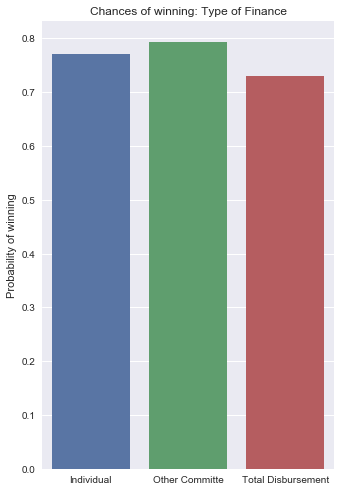

In [15]:
sns.set()
plot = pd.DataFrame({"Candidate Status":["Individual","Other Committe","Total Disbursement"],"Probability of winning":[prob_ind_contri,prob_other_comm,prob_total_disbur]})
g = sns.factorplot(x="Candidate Status", y="Probability of winning",data=plot, kind='bar',size=7, aspect=0.7)

for ax in g.axes.flatten():
#     ax.legend()
    ax.set_xlabel('')
    ax.set_title('Chances of winning: Type of Finance')
    g.savefig("finance.jpg",dpi=1000)
